<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/Projet_Final_COURSERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prédiction de l'atterrissage du premier étage du SpaceX Falcon 9**

# Lab 1 : Collecte des données

Dans cette synthèse, nous prédirons si le premier étage du Falcon 9 atterrira avec succès. SpaceX annonce sur son site Internet les lancements de la fusée Falcon 9 pour un coût de 62 millions de dollars ; les autres fournisseurs coûtent plus de 165 millions de dollars chacun, une grande partie des économies étant due au fait que SpaceX peut réutiliser le premier étage. Par conséquent, si nous pouvons déterminer si le premier étage atterrira, nous pouvons déterminer le coût d’un lancement. Ces informations peuvent être utilisées si une autre société souhaite soumissionner contre SpaceX pour un lancement de fusée. Dans cet atelier, vous collecterez et vous assurerez que les données sont au bon format à partir d'une API. Ce qui suit est un exemple de lancement réussi.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/landing_1.gif)

Plusieurs exemples d'atterrissage raté sont présentés ici :
![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/lab_v2/images/crash.gif)


La plupart des atterrissages infructueux sont prévus. Space X effectue un atterrissage contrôlé dans les océans.

## Objectifs

Dans cet atelier, vous effectuerez une requête get à l'API SpaceX. Vous effectuerez également quelques manipulations et formatages de données de base.

- Requête à l'API SpaceX
- Nettoyer les données demandées

## Importer des bibliothèques et définir des fonctions auxiliaires

In [ ]:
# Requests nous permet de faire des requêtes HTTP que nous utiliserons pour obtenir des données d'une API
import requests
import pandas as pd
import numpy as np
# Datetime est une bibliothèque qui nous permet de représenter des dates

import datetime
# Définir cette option imprimera toutes les colonnes d'un dataframe
pd.set_option('display.max_columns', None)
# La définition de cette option imprimera toutes les données d'une entité
pd.set_option('display.max_colwidth', None)

# Exploration et visualisation
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

Ci-dessous, nous définirons une série de fonctions d'assistance qui nous aideront à utiliser l'API pour extraire des informations à l'aide de numéros d'identification dans les données de lancement.

Dans la colonne <code>rocket</code>, nous aimerions connaître le nom du booster.

In [ ]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

Depuis le <code>launchpad</code> nous aimerions connaître le nom du site de lancement utilisé, la logitude et la latitude.

In [ ]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

À partir de la <code>payload</code>, nous aimerions connaître la masse de la charge utile et l'orbite vers laquelle elle se dirige.

In [ ]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

À partir des <code>cores</code>, nous aimerions connaître le résultat de l'atterrissage, le type d'atterrissage, le nombre de vols avec ce noyau, si des ailerons ont été utilisés, si le noyau est réutilisé, si des jambes ont été utilisées, le la piste d'atterrissage utilisée, le bloc du noyau qui est un numéro utilisé pour séparer les versions des noyaux, le nombre de fois que ce noyau spécifique a été réutilisé et la série du noyau.

In [ ]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

Commençons maintenant à demander des données de lancement de fusée à l'API SpaceX avec l'URL suivante :

In [ ]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [ ]:
response = requests.get(spacex_url)

Regardons le contenu

In [ ]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

Vous devriez voir que la réponse contient des informations massives sur les lancements de SpaceX. Essayons ensuite de découvrir des informations plus pertinentes pour ce projet.

### Tâche 1 : demander et analyser les données de lancement de SpaceX à l'aide de la requête GET

Pour rendre les résultats JSON demandés plus cohérents, nous utiliserons l'objet de réponse statique suivant pour ce projet :

In [ ]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

Nous devrions voir que la demande a réussi avec le code de réponse d'état 200

In [ ]:
response.status_code

200

Maintenant, nous décodons le contenu de la réponse en tant que Json en utilisant <code>.json()</code> et le transformons en une trame de données Pandas en utilisant <code>.json_normalize()</code>

In [ ]:
data = pd.json_normalize(response.json())

In [ ]:
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

Vous remarquerez qu’une grande partie des données sont des identifiants. Par exemple, la colonne de fusée ne contient aucune information sur la fusée, juste un numéro d'identification.

Nous allons maintenant utiliser à nouveau l'API pour obtenir des informations sur les lancements en utilisant les identifiants donnés pour chaque lancement. Plus précisément, nous utiliserons les colonnes <code>rocket</code>, <code>payloads</code>, <code>launchpad</code> et <code>cores</code>.

In [ ]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

* De la <code>rocket</code> nous aimerions connaître le nom du booster

* À partir de la <code>payload</code>, nous aimerions connaître la masse de la charge utile et l'orbite sur laquelle elle va se diriger.

* Depuis le <code>launchpad</code> nous aimerions connaître le nom du site de lancement utilisé, la longitude et la latitude.

* À partir des <code>cores</code>, nous aimerions connaître le résultat de l'atterrissage, le type d'atterrissage, le nombre de vols avec ce noyau, si des ailerons ont été utilisés, si le noyau est réutilisé, si des jambes ont été utilisées, la piste d'atterrissage utilisée, le bloc du noyau qui est un numéro utilisé pour séparer les versions des noyaux, le nombre de fois que ce noyau spécifique a été réutilisé et la série du noyau.

Les données de ces requêtes seront stockées dans des listes et seront utilisées pour créer une nouvelle trame de données.

In [ ]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

Ces fonctions appliqueront les sorties globalement aux variables ci-dessus. Jetons un coup d'œil à la variable <code>BoosterVersion</code>. Avant d'appliquer <code>getBoosterVersion</code>, la liste est vide :

In [ ]:
BoosterVersion

[]

Maintenant, appliquons la méthode de fonction <code> getBoosterVersion</code> pour obtenir la version booster

In [ ]:
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
getLaunchSite(data)

In [ ]:
getPayloadData(data)

In [ ]:
getCoreData(data)

Enfin, construisons notre ensemble de données en utilisant les données que nous avons obtenues. Nous combinons les colonnes dans un dictionnaire.

In [ ]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


Ensuite, nous devons créer une trame de données Pandas à partir du dictionnaire launch_dict.

In [ ]:
data = pd.DataFrame(launch_dict)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


Montre le résumé de la base des données

In [ ]:
data.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude
count,94.000000,88.000000,94.000000,90.000000,94.000000,94.000000,94.000000
mean,54.202128,5919.165341,1.755319,3.500000,3.053191,-75.553302,28.581782
std,30.589048,4909.689575,1.197544,1.595288,4.153938,53.391880,4.639981
min,1.000000,20.000000,1.000000,1.000000,0.000000,-120.610829,9.047721
25%,28.250000,2406.250000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,52.500000,4414.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,81.500000,9543.750000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,106.000000,15600.000000,6.000000,5.000000,13.000000,167.743129,34.632093


### Tâche 2 : Filtrer la trame de données pour inclure uniquement les lancements de "Falcon 9"

Enfin nous supprimerons les lancements Falcon 1 en ne gardant que les lancements Falcon 9. Filtrez la trame de données à l'aide de la colonne <code>BoosterVersion</code> pour conserver uniquement les lancements de Falcon 9. Enregistrez les données filtrées dans un nouveau dataframe appelé <code>data_falcon9</code>.

In [ ]:
# Hint data['BoosterVersion']!='Falcon 1'
data_falcon9 = data[data['BoosterVersion'].str.contains('Falcon 9', case=False)]
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,8,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,10,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,11,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,12,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


Maintenant que nous avons supprimé certaines valeurs, nous devons réinitialiser la colonne FlgihtNumber

In [ ]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

<ipython-input-26-2ab9c8788c03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


## Le traitement des données

Nous pouvons voir ci-dessous que certaines lignes manquent de valeurs dans notre ensemble de données.

In [ ]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Avant de pouvoir continuer, nous devons nous occuper de ces valeurs manquantes. La colonne <code>LandingPad</code> conservera les valeurs None pour représenter le moment où les aires d'atterrissage n'ont pas été utilisées.

## Le traitement des données mabquantes

Calculez ci-dessous la moyenne du <code>PayloadMass</code> en utilisant <code>.mean()</code>. Utilisez ensuite la moyenne et la fonction <code>.replace()</code> pour remplacer les valeurs `np.nan` dans les données par la moyenne que vous avez calculée.

In [ ]:
moy = data_falcon9['PayloadMass'].mean()
moy

6123.547647058824

In [ ]:
data_falcon9['PayloadMass'].replace(np.nan, moy, inplace = True)

<ipython-input-29-4fdeb6e6f304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].replace(np.nan, moy, inplace = True)


Vous devriez voir le nombre de valeurs manquantes du <code>PayLoadMass</code> passer à zéro.

In [ ]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

Maintenant, nous ne devrions avoir aucune valeur manquante dans notre ensemble de données, sauf dans <code>LandingPad</code>.

Nous pouvons maintenant l'exporter au format <b>CSV</b> pour la section suivante, mais pour que les réponses soient cohérentes, dans le prochain atelier, nous fournirons des données dans une plage de dates présélectionnée.

In [ ]:
data_falcon9.to_csv('dataset_part_1.csv', index=True)


### **Analyse des données**

In [ ]:
df = data_falcon9
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
9,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1005,-80.577366,28.561857
10,7,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1,False,False,True,None,1.0,0,B1006,-80.577366,28.561857
11,8,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1,False,False,True,None,1.0,0,B1007,-80.577366,28.561857
12,9,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1008,-80.577366,28.561857
13,10,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1011,-80.577366,28.561857


Identifions et calculons le pourcentage des valeurs manquantes de chaque variables

In [ ]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identifions les colones qui sont numériques ou catégorielles

In [ ]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

### **TÂCHE 1 : Calculer le nombre de lancements sur chaque site**

Les données contiennent plusieurs installations de lancement de Space X : <a href='https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites'>Cape Canaveral Space</a> Launch Complex 40 <b>VAFB SLC 4E </b> , Complexe de lancement spatial 4E de la base aérienne de Vandenberg <b>(SLC-4E)</b>, complexe de lancement du centre spatial Kennedy 39A <b>KSC LC 39A </b>. L'emplacement de chaque lancement est placé dans la colonne <code >Site de lancement</code>

Voyons ensuite le nombre de lancements pour chaque site.

Utilisez la méthode <code>value_counts()</code> sur la colonne <code>LaunchSite</code> pour déterminer le nombre de lancements sur chaque site :

In [ ]:
from pandas.core.frame import DataFrame
l = df['LaunchSite'].value_counts()
l = DataFrame(l)
l

,LaunchSite
CCSFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


Chaque lancement vise une orbite dédiée, et voici quelques types d'orbites courants :
* <b>LEO</b> : l'orbite terrestre basse (LEO) est une orbite centrée sur la Terre avec une altitude de 2 000 km (1 200 mi) ou moins (environ un tiers du rayon de la Terre),[1] ou avec au moins 11,25 périodes par jour (une période orbitale de 128 minutes ou moins) et une excentricité inférieure à 0,25.[2] La plupart des objets fabriqués par l'homme dans l'espace se trouvent en LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit'>[1]</a>.

* <b>VLEO</b> : les orbites terrestres très basses (VLEO) peuvent être définies comme des orbites dont l'altitude moyenne est inférieure à 450 km. Opérer sur ces orbites peut offrir un certain nombre d'avantages aux engins spatiaux d'observation de la Terre, car ils opèrent plus près de l'observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges'>[2]</a>.


* <b>GTO</b> Une orbite géosynchrone est une orbite terrestre haute qui permet aux satellites de suivre la rotation de la Terre. Située à 22 236 milles (35 786 kilomètres) au-dessus de l'équateur terrestre, cette position est un endroit précieux pour surveiller la météo, les communications et la surveillance. Parce que le satellite orbite à la même vitesse que la Terre, il semble rester en place sur une seule longitude, bien qu'il puisse dériver du nord au sud", a écrit la NASA sur son site Internet de l'Observatoire de la Terre <a href="https:/ /www.space.com/29222-geosynchronous-orbit.html" >[3] </a>.


* <b>SSO (ou SO)</b> : Il s'agit d'une orbite héliosynchrone également appelée orbite héliosynchrone. C'est une orbite presque polaire autour d'une planète, dans laquelle le satellite passe au-dessus de n'importe quel point donné de la surface de la planète à la même heure solaire moyenne locale <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit">[4] <a>.
    
    
    
* <b>ES-L1 </b> : Aux points de Lagrange les forces gravitationnelles des deux grands corps s'annulent de telle sorte qu'un petit objet placé en orbite y est en équilibre par rapport au centre de masse du grand corps. L1 est l'un de ces points entre le soleil et la terre <a href="https://en.wikipedia.org/wiki/Lagrange_point#L1_point">[5]</a> .
    
    
* <b>HEO</b> Une orbite hautement elliptique est une orbite elliptique avec une excentricité élevée, faisant généralement référence à celle autour de la Terre <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit">[6 ]</a>.


* <b> ISS </b> Une station spatiale modulaire (satellite artificiel habitable) en orbite terrestre basse. Il s'agit d'un projet collaboratif multinational entre cinq agences spatiales participantes : NASA (États-Unis), Roscosmos (Russie), JAXA (Japon), ESA (Europe) et CSA (Canada)<a href="https://en.wikipedia .org/wiki/International_Space_Station"> [7] </a>


* <b> MEO </b> Orbites géocentriques allant d'une altitude de 2 000 km (1 200 mi) à juste en dessous de l'orbite géosynchrone à 35 786 kilomètres (22 236 mi). Également connue sous le nom d’orbite circulaire intermédiaire. Ce sont « le plus souvent à 20 200 kilomètres (12 600 mi), ou 20 650 kilomètres (12 830 mi), avec une période orbitale de 12 heures <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [8 ] </a>


* <b> HEO </b> Orbites géocentriques au-dessus de l'altitude de l'orbite géosynchrone (35 786 km ou 22 236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [9] </a >


* <b> GEO </b> Il s'agit d'une orbite géosynchrone circulaire à 35 786 kilomètres (22 236 miles) au-dessus de l'équateur terrestre et suivant la direction de rotation de la Terre <a href="https://en.wikipedia.org/wiki/Geostationary_orbit" > [10] </a>


* <b> PO </b> Il s'agit d'un type de satellite dans lequel un satellite passe au-dessus ou presque au-dessus des deux pôles du corps en orbite (généralement une planète telle que la Terre <a href="https://en. wikipedia.org/wiki/Polar_orbit"> [11] </a>

certains sont présentés dans le graphique suivant :

### **TÂCHE 2 : Calculer le nombre et l'occurrence de chaque orbite**

Utilisez la méthode <code>.value_counts()</code> pour déterminer le numéro et l'occurrence de chaque orbite dans la colonne <code>Orbite</code>

In [ ]:
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

### **TÂCHE 3 : Calculer le nombre et l'occurrence des résultats de la mission sur les orbites**

Utilisez la méthode <code>.value_counts()</code> sur la colonne <code>Outcome</code> pour déterminer le nombre de <code>landing_outcomes</code>. Affectez-la ensuite à une variable landing_outcomes.

In [ ]:
landing_outcomes = df['Outcome'].value_counts()
DataFrame(landing_outcomes)

,Outcome
True ASDS,41
None None,19
True RTLS,14
False ASDS,6
True Ocean,5
False Ocean,2
None ASDS,2
False RTLS,1


<code>True Ocean</code> signifie que le résultat de la mission a été réussi à atterrir dans une région spécifique de l'océan, tandis que <code>False Ocean</code> signifie que le résultat de la mission a échoué dans une région spécifique de l'océan. <code>Vrai RTLS</code> signifie que le résultat de la mission a été atterri avec succès sur une plateforme au sol. <code>Faux RTLS</code> signifie que le résultat de la mission n'a pas été atterri avec succès sur une plateforme au sol.<code>Vrai ASDS</code> signifie que le résultat de la mission a été atterri avec succès sur un drone. <code>Faux ASDS</code> signifie que le résultat de la mission n'a pas été atterri sur un drone. <code>Aucun ASDS</code> et <code>Aucun Aucun</code> représentent un échec d'atterrissage.

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
  print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


Nous créons un ensemble de résultats là où la deuxième étape n’a pas abouti (False ou none):

In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

### **TÂCHE 4 : Créer une étiquette de résultat d'atterrissage à partir de la colonne Outcome**

À l'aide du <code>Outcome</code>, créez une liste où l'élément est nul si la ligne correspondante dans <code>Outcome</code> est dans l'ensemble <code>bad_outcome</code> ; sinon, c'en est un. Affectez-le ensuite à la variable <code>landing_class</code> :

In [ ]:
landing_class= []

for Outcome in df['Outcome']:
  if Outcome in bad_outcomes:
    landing_class.append(0)
  else:
    landing_class.append(1)


Cette variable représentera la variable de classification qui représente le résultat de chaque lancement. Si la valeur est zéro, le premier étage n’a pas atterri correctement ; un signifie que le premier étage a atterri avec succès

In [ ]:
df['Class'] = landing_class
df[['Class']].head(8)

<ipython-input-41-cab164517173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = landing_class


,Class
4,0
5,0
6,0
7,0
8,0
9,0
10,1
11,1


In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
df['Class'].mean()

0.6666666666666666

# **Exploration des données avec SQL**

In [ ]:
# Les librairies nécéssaires
# !pip install sqlalchemy==1.3.9
# %load_ext sql
# import csv, sqlite3

# con = sqlite3.connect("my_data1.db")
# cur = con.cursor()
#!pip install -q pandas==1.1.5
#import pandas as pd
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
#df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")
#%sql sqlite:///my_data1.db
#%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

## Tâches

Maintenant, écrivez et exécutez des requêtes SQL pour résoudre les tâches d'affectation.

**Remarque : Si les noms de colonnes sont en casse mixte, placez-les entre guillemets doubles.
    Par exemple "Landing_Outcome"**

### ** Tache 1**


##### **Afficher les noms des sites de lancement uniques de la mission spatiale**

In [ ]:
# SPACEXTBL

In [ ]:
#%sql SELECT * FROM SPACEXTBL;

UsageError: Line magic function `%sql` not found.


In [ ]:
#%sql select distinct Launch_Site From SPACEXTBL;


### **Tâche 2**


##### **Afficher 5 enregistrements où les sites de lancement commencent par la chaîne 'CCA'**

In [ ]:
#%sql SELECT * FROM SPACEXTBL WHERE Launch_Site like 'CCA%' LIMIT 5;

### Tâche 3




##### Afficher la masse totale de la charge utile transportée par les boosters lancés par la NASA (CRS)

In [ ]:
#%sql SELECT SUM(PAYLOAD_MASS__KG_) AS TOTAL FROM SPACEXTBL WHERE Customer like "NASA (CRS)";

### **Tâche 4**




##### **Afficher la masse moyenne de la charge utile transportée par le booster version F9 v1.1**

In [ ]:

#%sql SELECT Booster_Version,  AVG(PAYLOAD_MASS__KG_) AS MEAN FROM SPACEXTBL WHERE Booster_Version LIKE "%F9 v1.1";



### **Tâche 5**
##### **Indiquez la date à laquelle le premier résultat d'atterrissage réussi sur la plate-forme au sol a été obtenu.**
Astuce : utilisez la fonction min

In [ ]:

#%sql SELECT Date, MIN(Date) FROM SPACEXTBL WHERE Landing_Outcome LIKE "%Success (ground pad)%";


### Tâche 6

##### Répertoriez les noms des boosters qui ont du succès dans les drones et dont la masse de charge utile est supérieure à 4 000 mais inférieure à 6 000.

In [ ]:

#%sql SELECT Booster_Version FROM SPACEXTBL WHERE Landing_Outcome like "%Success (drone ship)%" AND PAYLOAD_MASS__KG_ > 4000 AND PAYLOAD_MASS__KG_ < 6000;

### Tâche 7




##### Répertoriez le nombre total de résultats de mission réussis et échoués

In [ ]:

#%sql SELECT COUNT(Mission_Outcome) AS COMPTE FROM SPACEXTBL GROUP BY  Mission_Outcome;

### Tâche 8



##### Répertoriez les noms des booster_versions qui ont transporté la masse de charge utile maximale. Utiliser une sous-requête

In [ ]:

#%sql SELECT DISTINCT b.Booster_Version FROM SPACEXTBL b WHERE b.PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL);


### Tâche 9


##### Répertoriez les enregistrements qui afficheront les noms des mois, les résultats d'atterrissage en cas d'échec dans le drone, les versions de booster, le site de lancement pour les mois de l'année 2015.

**Remarque : SQLLite ne prend pas en charge les noms de mois. Vous devez donc utiliser substr(Date, 6,2) comme mois pour obtenir les mois et substr(Date,0,5)='2015' pour l'année.**

In [ ]:

#%sql SELECT substr(Date, 6, 2) AS Month, Landing_Outcome AS Landing_Outcome, Booster_Version AS Booster_Version,Launch_Site AS Launch_Site FROM SPACEXTBL WHERE substr(Date, 0, 5) like '2015' AND  Mission_Outcome like 'Failure' AND Landing_Outcome like '%Failure (drone ship)%';


### Tâche 10




##### Classez le nombre de résultats d'atterrissage (tels que l'échec (navire drone) ou la réussite (plateforme au sol)) entre la date du 04/06/2010 et celle du 20/03/2017, par ordre décroissant.

In [ ]:


#%sql SELECT Landing_Outcome, COUNT(*) AS Count FROM SPACEXTABLE WHERE Date BETWEEN '2010-06-04' AND '2017-03-20'GROUP BY Landing_Outcome ORDER BY Count DESC;


###**Exploration et préparation des données avec `pandas et Matplotlib`**

In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0


Tout d'abord, essayons de voir comment les variables « FlightNumber » (indiquant les tentatives de lancement continues) et « Payload » affecteraient le résultat du lancement.

Nous pouvons tracer le <code>FlightNumber</code> par rapport au <code>PayloadMass</code> et superposer le résultat du lancement. Nous constatons qu’à mesure que le nombre de vols augmente, le premier étage a plus de chances d’atterrir avec succès. La masse de la charge utile est également importante ; il semble que plus la charge utile est massive, moins le premier étage a de chances de revenir.

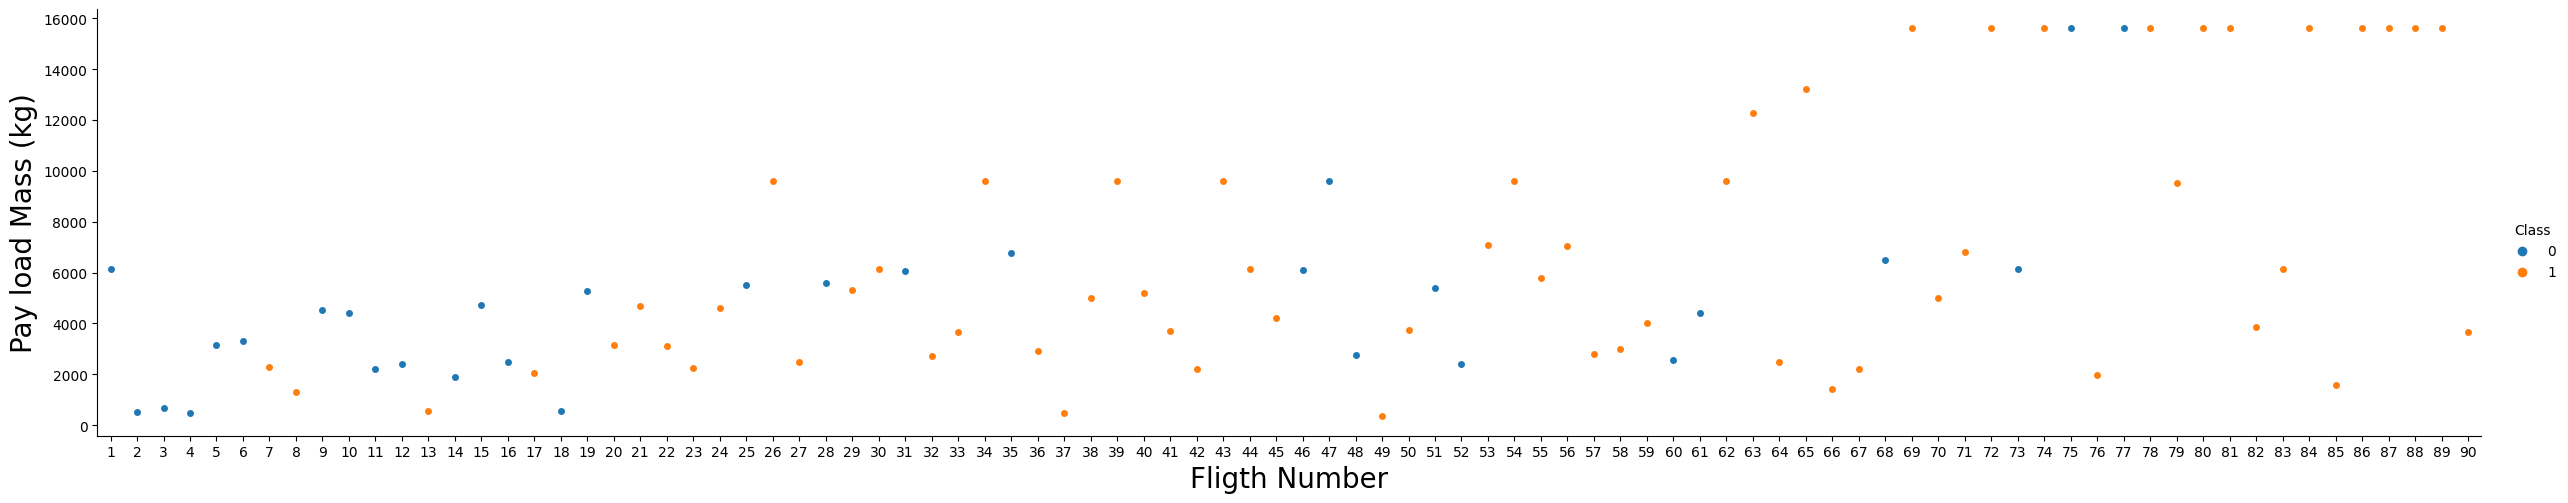

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data =df, aspect=5)
plt.xlabel("Fligth Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

Nous constatons que différents sites de lancement ont des taux de réussite différents. <code>CCAFS LC-40</code>, a un taux de réussite de 60 %, tandis que <code>KSC LC-39A</code> et <code>VAFB SLC 4E</code> ont un taux de réussite de 77 % .

Examinons ensuite chaque site pour visualiser ses enregistrements de lancement détaillés.

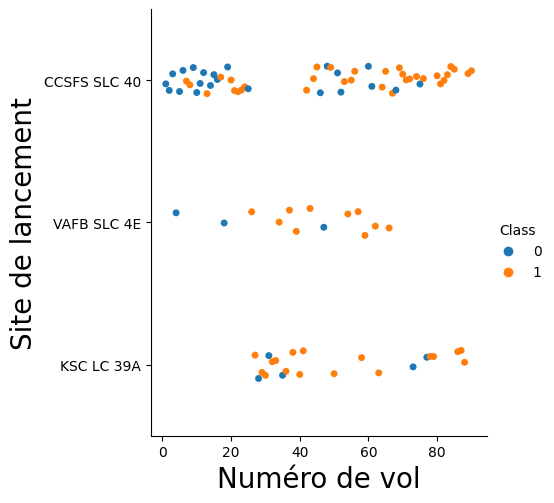

In [ ]:
### TÂCHE 1 : Visualiser la relation entre le numéro de vol et le site de lancement

sns.catplot(x='FlightNumber', y='LaunchSite', data=df, hue='Class', aspect = 1)
plt.xlabel("Numéro de vol", fontsize=20)
plt.ylabel("Site de lancement", fontsize=20)
plt.show()


Utilisez la fonction <code>catplot</code> pour tracer <code>FlightNumber</code> par rapport à <code>LaunchSite</code>, définissez le paramètre <code>x</code> sur <code>FlightNumber</ code>, définissez le <code>y</code> sur <code>Launch Site</code> et définissez le paramètre <code>hue</code> sur <code>'class'</code>

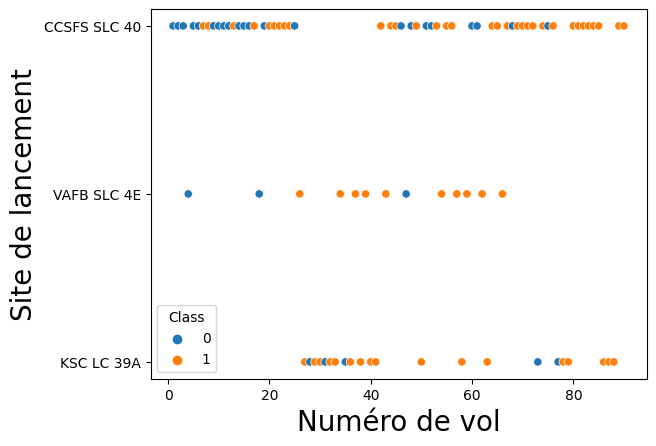

In [ ]:
sns.scatterplot(x='FlightNumber', y='LaunchSite', data=df, hue='Class')
plt.xlabel("Numéro de vol", fontsize=20)
plt.ylabel("Site de lancement", fontsize=20)
plt.show()

Essayez maintenant d'expliquer les modèles que vous avez trouvés dans les diagrammes de points de dispersion Numéro de vol par rapport au site de lancement.

Nous souhaitons également observer s’il existe une relation entre les sites de lancement et la masse de leur charge utile.

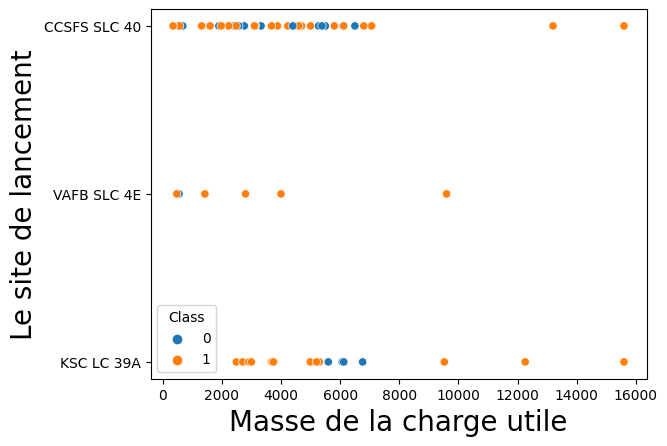

In [ ]:
### TÂCHE 2 : Visualiser la relation entre la charge utile et le site de lancement

sns.scatterplot(x="PayloadMass", y='LaunchSite', data=df, hue='Class')
plt.xlabel("Masse de la charge utile", fontsize=20)
plt.ylabel("Le site de lancement", fontsize=20)
plt.show()

Maintenant, si vous observez Payload Vs. Graphique de points de dispersion du site de lancement que vous trouverez pour le site de lancement VAFB-SLC, aucune fusée n'est lancée pour une masse de charge utile importante (supérieure à 10 000).

Ensuite, nous voulons vérifier visuellement s’il existe une relation entre le taux de réussite et le type d’orbite.

Créons un « graphique à barres » pour le taux de réussite de chaque orbite

<Axes: xlabel='Orbit', ylabel='count'>

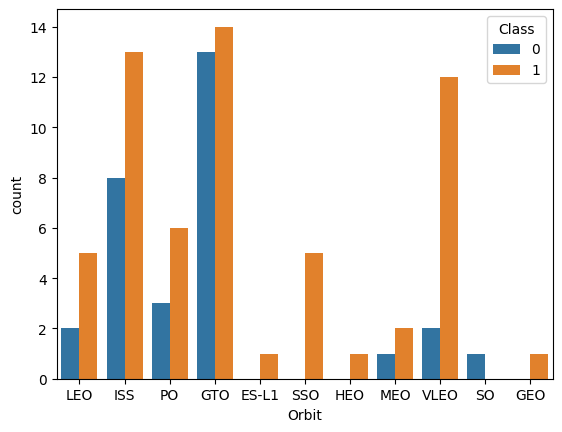

In [ ]:
from sqlalchemy.sql.expression import asc
### TASK  3: Visualize the relationship between success rate of each orbit type
sns.countplot(x="Orbit", data=df, hue='Class')


Analysez le graphique à barres et essayez de trouver quelles orbites ont un taux de réussite élevé.

In [ ]:
groupe = df.groupby("Orbit").sum()
groupe

<ipython-input-53-3409828f7879>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupe = df.groupby("Orbit").sum()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class
Orbit,,,,,,,,,,,
ES-L1,13,570.000000,1,1,0,1,1.0,0,-80.577366,28.561857,1
GEO,83,6123.547647,2,1,1,1,5.0,13,-80.577366,28.561857,1
GTO,946,135323.850000,38,17,9,17,82.0,30,-2175.828190,771.585954,14
HEO,49,350.000000,1,1,0,1,4.0,1,-80.577366,28.561857,1
ISS,822,68878.700000,26,17,5,18,66.0,49,-1692.257635,600.030006,13
LEO,140,27235.642941,7,4,0,5,15.0,3,-564.094742,200.025403,5
MEO,233,11961.000000,3,2,0,2,15.0,20,-241.732098,85.685571,2
PO,327,68253.000000,12,8,3,7,29.0,18,-1085.497461,311.688837,6
SO,73,6123.547647,4,0,1,0,5.0,3,-80.603956,28.608058,0


Pour chaque orbite, nous voulons voir s'il existe une relation entre FlightNumber et le type d'Orbit.

<Axes: xlabel='FlightNumber', ylabel='Orbit'>

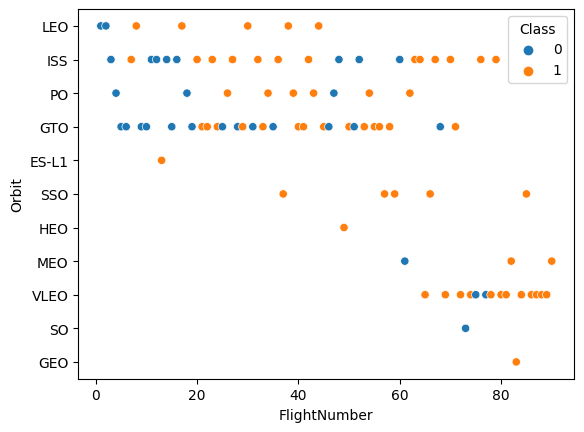

In [ ]:
sns.scatterplot(x="FlightNumber", y="Orbit", data=df, hue='Class')

Vous devriez voir que sur l'orbite LEO, le succès apparaît en rapport avec le nombre de vols ; d'un autre côté, il ne semble y avoir aucune relation entre le numéro de vol en orbite GTO.

De même, nous pouvons tracer les graphiques à points de dispersion Charge utile par rapport à l'Orbite pour révéler la relation entre la charge utile et le type d'orbite.

<Axes: xlabel='PayloadMass', ylabel='Orbit'>

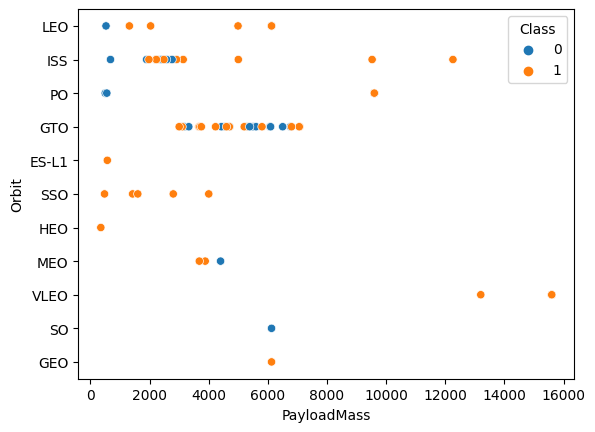

In [ ]:
sns.scatterplot(x="PayloadMass", y="Orbit", data=df, hue='Class')

Avec des charges utiles lourdes, le taux d'atterrissage réussi ou positif est plus important pour Polar, LEO et ISS.

Cependant, pour GTO, nous ne pouvons pas bien distinguer cela car le taux d'atterrissage positif et le taux d'atterrissage négatif (mission infructueuse) sont tous deux présents ici.

Vous pouvez tracer un graphique linéaire avec l'axe des x comme étant <code>Année</code> et l'axe des y comme le taux de réussite moyen, pour obtenir la tendance moyenne du succès du lancement.
La fonction vous aidera à obtenir l'année à partir de la date :

In [ ]:
import pandas as pd

# Convertissez la colonne 'Date' en type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Utilisez l'attribut .dt.year pour extraire l'année
df['Year'] = df['Date'].dt.year

# Affichez le DataFrame résultant
df.head()

<ipython-input-56-b46ead5f035e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-56-b46ead5f035e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0,2010
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0,2012
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0,2013
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0,2013
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0,2013


In [ ]:
success = df[df['Class']==1]
success.head()
total = success.groupby('Year')['Class'].sum()
taux = total/ sum(total)*100
taux= pd.DataFrame(taux)
taux

,Class
Year,
2014,3.333333
2015,3.333333
2016,8.333333
2017,25.000000
2018,18.333333
2019,15.000000
2020,26.666667


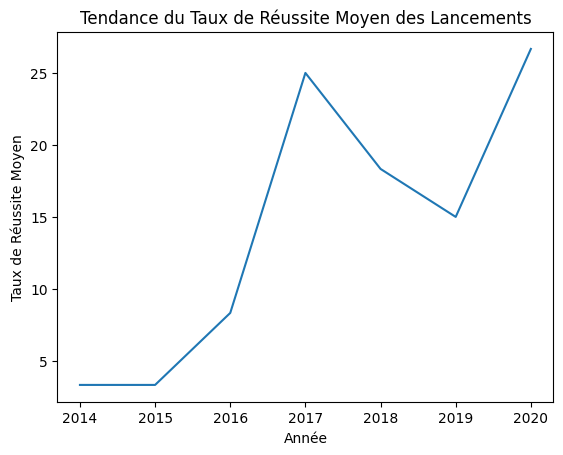

In [ ]:
sns.lineplot(x="Year", y="Class", data=taux)
plt.title("Tendance du Taux de Réussite Moyen des Lancements")
plt.xlabel("Année")
plt.ylabel("Taux de Réussite Moyen")
plt.show()

vous pouvez observer que le taux de réussite depuis 2013 n'a cessé d'augmenter jusqu'en 2020

## **Features Engineering**

À présent, vous devriez obtenir quelques informations préliminaires sur la manière dont chaque variable importante affecterait le taux de réussite. Nous sélectionnerons les fonctionnalités qui seront utilisées dans la prédiction du succès dans le futur module.

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
4,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0003
5,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0005
6,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,None,1.0,0,B0007
7,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,None,1.0,0,B1003
8,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,None,1.0,0,B1004


### **Créer des variables factices dans les colonnes catégorielles**

Utilisez la fonction <code>get_dummies</code> et le dataframe <code>features</code> pour appliquer OneHotEncoder à la colonne <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad< /code> et <code>Série</code>. Attribuez la valeur à la variable <code>features_one_hot</code>, affichez les résultats à l'aide de la méthode head. Votre dataframe de résultat doit inclure toutes les fonctionnalités, y compris celles codées.

In [ ]:
from pandas.core.reshape.encoding import get_dummies
columns_to_encode = ["Orbit", "LaunchSite", "LandingPad", "Serial"]
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)
# Affichez les premières lignes du DataFrame résultant
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1,6123.547647,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,677.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,5,3170.000000,1,False,False,False,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Convertir toutes les colonnes numériques en `float64`

Maintenant que notre dataframe <code>features_one_hot</code> ne contient que des nombres, convertissez l'intégralité du dataframe en type de variable <code>float64</code>

In [ ]:
features_one_hot= features_one_hot.astype("float64")

In [ ]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [ ]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Visualisation géographique des donnés avec Folium**

In [ ]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon

Identifions les sites de lancement.
Tout d'abord, essayons d'ajouter l'emplacement de chaque site sur une carte en utilisant les coordonnées de latitude et de longitude du site.

In [ ]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857,0,2010
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857,0,2012
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857,0,2013
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093,0,2013
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857,0,2013


Tout d'abord, essayons d'ajouter l'emplacement de chaque site sur une carte en utilisant les coordonnées de latitude et de longitude du site.


L'ensemble de données suivant portant le nom « spacex_launch_geo.csv » est un ensemble de données augmenté avec la latitude et la longitude ajoutées pour chaque site.

Maintenant, vous pouvez voir quelles sont les coordonnées de chaque site.

In [ ]:
## Tâche 1 : Marquer tous les sites de lancement sur une carte
spacex_df = df[['LaunchSite', 'Latitude', 'Longitude', 'Class']]
launch_sites_df = spacex_df.groupby(['LaunchSite'], as_index=False).first()
launch_sites_df = launch_sites_df[['LaunchSite', 'Latitude', 'Longitude']]
launch_sites_df

,LaunchSite,Latitude,Longitude
0,CCSFS SLC 40,28.561857,-80.577366
1,KSC LC 39A,28.608058,-80.603956
2,VAFB SLC 4E,34.632093,-120.610829


In [ ]:
launch_sites_df.to_csv("launch_sites_df.csv", index=False)

Les coordonnées ci-dessus ne sont que des chiffres simples qui ne peuvent vous donner aucune idée intuitive de l'emplacement de ces sites de lancement. Si vous êtes très bon en géographie, vous pouvez interpréter ces chiffres directement dans votre esprit. Sinon, c'est bien aussi. Visualisons ces emplacements en les épinglant sur une carte.

Nous devons d’abord créer un objet « Map » folium, dont l’emplacement central initial sera le centre spatial Johnson de la NASA à Houston, au Texas.

In [ ]:
# Le lieu de départ est le centre spatial Johnson de la NASA
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)


Nous pourrions utiliser `folium.Circle` pour ajouter une zone de cercle en surbrillance avec une étiquette de texte sur une coordonnée spécifique. Par exemple,

In [ ]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
# Initial the map
site_map = folium.Map(location=[28.563197, -80.576820], zoom_start=5)
# Pour chaque site de lancement, ajoutez un objet Circle en fonction de ses valeurs de coordonnées (Lat, Long). De plus, ajoutez le nom du site de lancement comme étiquette contextuelle

# Create a blue circle at Site de lancement CCAFS SLC-40 with a popup label showing its name
circle = folium.Circle([28.563197, -80.576820], radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Site de lancement CCAFS SLC-40 '))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    [28.563197, -80.576820],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS SLC-40',
        )
    )

site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:

# Initial the map
site_map = folium.Map(location=[28.573255,	-80.646895], zoom_start=5)
# Pour chaque site de lancement, ajoutez un objet Circle en fonction de ses valeurs de coordonnées (Lat, Long). De plus, ajoutez le nom du site de lancement comme étiquette contextuelle

# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle([28.573255,	-80.646895], radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Site de lancement KSC LC-39A'))
# Create a blue circle at KSC LC-39A Launch site Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    [28.573255,	-80.646895],
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'KSC LC-39A',
        )
    )

site_map.add_child(circle)
site_map.add_child(marker)

In [ ]:
import folium
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)


# Site de lancement CCSFS SLC
site1_coords = [28.573255,	-80.646895]
folium.Marker(site1_coords, tooltip='Site de lancement CCSFS SLC ').add_to(site_map)
folium.Circle(site1_coords, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('Site de lancement KSC LC-39A')).add_to(site_map)
# Deuxième site : KSC LC-39A
site2_coords = [28.573255	,-80.646895]
folium.Marker(site2_coords, tooltip='KSC LC-39A').add_to(site_map)
folium.Circle(site2_coords, radius=100, color='red', fill=True).add_to(site_map)
site_map


In [ ]:
df.to_csv('df.csv', index=False)

Marquer les lancements réussis/échoués pour chaque site sur la carte

Essayons ensuite d'améliorer la carte en ajoutant les résultats de lancement pour chaque site et voyons quels sites ont des taux de réussite élevés.
Rappelez-vous que la trame de données spacex_df a des enregistrements de lancement détaillés et que la colonne « class » indique si ce lancement a réussi ou non.

In [ ]:
df=spacex_df
spacex_df.tail(10)

,LaunchSite,Latitude,Longitude,Class
84,CCSFS SLC 40,28.561857,-80.577366,1
85,CCSFS SLC 40,28.561857,-80.577366,1
86,CCSFS SLC 40,28.561857,-80.577366,1
87,CCSFS SLC 40,28.561857,-80.577366,1
88,CCSFS SLC 40,28.561857,-80.577366,1
89,KSC LC 39A,28.608058,-80.603956,1
90,KSC LC 39A,28.608058,-80.603956,1
91,KSC LC 39A,28.608058,-80.603956,1
92,CCSFS SLC 40,28.561857,-80.577366,1
93,CCSFS SLC 40,28.561857,-80.577366,1


In [ ]:
marker_cluster = MarkerCluster()


# La modèlisation
Space X annonce sur son site Internet le lancement de la fusée Falcon 9 pour un coût de 62 millions de dollars ; les autres fournisseurs coûtent plus de 165 millions de dollars chacun, une grande partie des économies étant due au fait que Space X peut réutiliser le premier étage. Par conséquent, si nous pouvons déterminer si le premier étage atterrira, nous pouvons déterminer le coût d’un lancement. Ces informations peuvent être utilisées si une autre société souhaite soumissionner contre Space X pour un lancement de fusée. Nous allons créer un pipeline d'apprentissage automatique pour prédire si la première étape aboutira à partir des données.


## Importons les librairies nécessaires

In [ ]:
from sklearn import  preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


Créons la fonction de la mmatrice de confusion. Qui permet d'évaluer la précision de notre modèle.

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "La fonction de la matrice de confusion"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Les labeles prédits')
    ax.set_ylabel('Les vrais labels')
    ax.set_title('Matrice de Confusion ');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

Les données:

In [ ]:
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
4,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = features_one_hot
X.shape


(90, 80)

Créez un tableau NumPy à partir de la colonne <code>Class</code> dans <code>df</code>, en appliquant la méthode <code>to_numpy()</code> puis
affectez-le à la variable <code>Y</code>, assurez-vous que la sortie est une série Pandas (un seul crochet df\['name of column']).

In [ ]:
data = df
y = data['Class'].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0])

Standardisez les données dans <code>X</code> puis réaffectez-les à la variable <code>X</code> à l'aide de la transformation fournie ci-dessous.

In [ ]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


Nous divisons les données en données de formation et de test à l'aide de la fonction <code>train_test_split</code>. Les données d'entraînement sont divisées en données de validation, un second ensemble étant utilisé pour les données d'entraînement ; puis les modèles sont entraînés et les hyperparamètres sont sélectionnés à l'aide de la fonction <code>GridSearchCV</code>.

Utilisez la fonction train_test_split pour diviser les données X et Y en données d'entraînement et de test. Définissez le paramètre test_size sur 0,2 et random_state sur 2. Les données d'entraînement et les données de test doivent être attribuées aux étiquettes suivantes: X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
Y_test.shape

(18,)

### **La régression Logistique**

Créez un objet de régression logistique puis créez un objet GridSearchCV <code>logreg_cv</code> avec cv = 10. Ajustez l'objet pour trouver les meilleurs paramètres du dictionnaire <code>paramètres</code>.

In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv =5, scoring='accuracy')
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy')

Nous générons l'objet <code>GridSearchCV</code> pour la régression logistique. Nous affichons les meilleurs paramètres en utilisant l'attribut de données <code>best_params\_</code> et la précision sur les données de validation en utilisant l'attribut de données <code>best_score\_</code>.

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8342857142857142


Calculons l'accuracy score sur les données de test

In [ ]:
from sklearn.metrics import accuracy_score
# le meilleur modèle
best_modele = logreg_cv.best_estimator_
best_modele
yhat = best_modele.predict(X_test)
Accuracy = accuracy_score(Y_test, yhat)
score_lr = Accuracy

Construisons la matrice de confuision

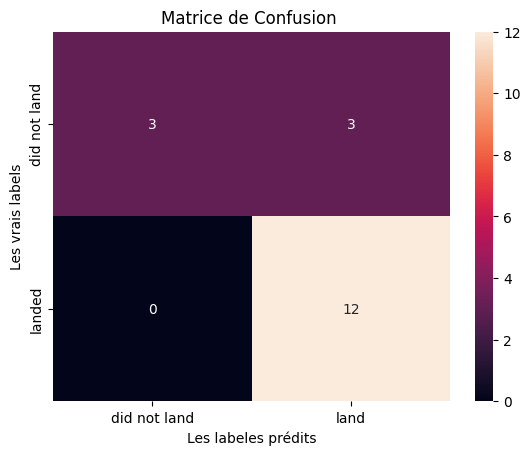

In [ ]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

En examinant la matrice de confusion, nous voyons que la régression logistique permet de distinguer les différentes classes. Nous voyons que le problème majeur réside dans les faux positifs.

###**SVM**
Créez un objet machine à vecteurs de support puis créez un objet <code>GridSearchCV</code> <code>svm_cv</code> avec cv - 10. Ajustez l'objet pour trouver les meilleurs paramètres du dictionnaire <code>paramètres</code> .

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10, scoring="accuracy")
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


Calculons la précision sur les données de test en utilisant la méthode score.

In [ ]:
best_modele = svm_cv.best_estimator_
yhatt = best_modele.predict(X_test)
score = accuracy_score(Y_test, yhatt)
score_svm = score

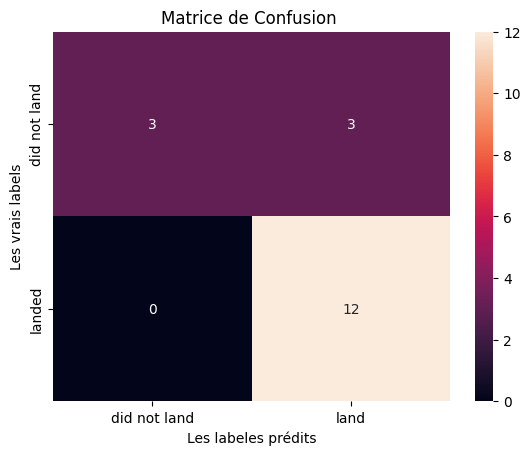

In [ ]:
yhatt=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhatt)

###**Arbre de décision**

Créez un objet classificateur d'arbre de décision puis créez un objet <code>GridSearchCV</code> <code>tree_cv</code> avec cv = 10. Ajustez l'objet pour trouver les meilleurs paramètres du dictionnaire <code>paramètres</code> .

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10, scoring="accuracy")
tree_cv.fit(X_train, Y_train)

print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8589285714285715


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
bestmodele = tree_cv.best_estimator_
yhat= bestmodele.predict(X_test)
score = accuracy_score(Y_test, yhat)
score_tree =score
score_tree

0.8888888888888888

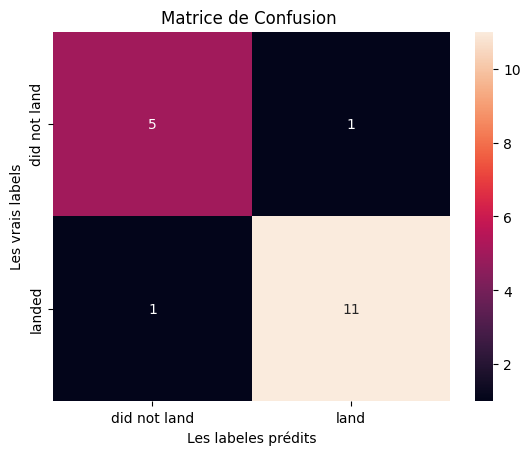

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

###**KNN**
Créez un objet k voisins les plus proches puis créez un objet <code>GridSearchCV</code> <code>knn_cv</code> avec cv = 10. Ajustez l'objet pour trouver les meilleurs paramètres du dictionnaire <code>paramètres</code>.

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10, scoring="accuracy")

knn_cv.fit(X_train, Y_train)
bestmodele = knn_cv.best_estimator_
yhat = bestmodele.predict(X_test)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


In [ ]:
score_knn = accuracy_score(Y_test, yhat)

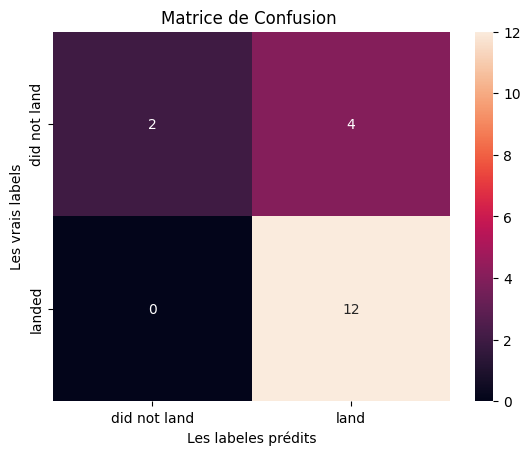

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

###**Trouvez le modèle la plus performante :**

In [ ]:
PRECISION = {"Modèle":("LR", "SVM", "TREE", "KNN"),
             "Acuracy":(score_lr, score_svm, score_tree, score_knn)}
PRECISION = pd.DataFrame(PRECISION)
PRECISION

,Modèle,Acuracy
0,LR,0.833333
1,SVM,0.833333
2,TREE,0.888889
3,KNN,0.777778


**A travers les accuracy score, le choix portera sur le modèle de Tree.**

In [ ]:
import requests

url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/auto-complete"

querystring = {"q":"FCHI","region":"FR"}

headers = {
	"X-RapidAPI-Key": "6be3e4641emshb584724957b7b52p181898jsn700ee8b62e69",
	"X-RapidAPI-Host": "apidojo-yahoo-finance-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'explains': [], 'count': 4, 'quotes': [{'exchange': 'PAR', 'shortname': 'CAC 40', 'quoteType': 'INDEX', 'symbol': '^FCHI', 'index': 'quotes', 'score': 21082.0, 'typeDisp': 'Indice', 'longname': 'CAC 40', 'exchDisp': 'Paris', 'isYahooFinance': True}, {'exchange': 'GER', 'shortname': 'KSI-ICBCCS S+P CN500UE', 'quoteType': 'ETF', 'symbol': 'FCHIN.DE', 'index': 'quotes', 'score': 20004.0, 'typeDisp': 'Trackers', 'exchDisp': 'XETRA', 'isYahooFinance': True}, {'exchange': 'NAS', 'shortname': 'Franklin High Income Fund Class', 'quoteType': 'MUTUALFUND', 'symbol': 'FCHIX', 'index': 'quotes', 'score': 20001.0, 'typeDisp': 'Fonds', 'longname': 'Franklin High Income C', 'exchDisp': 'NASDAQ', 'isYahooFinance': True}, {'exchange': 'MIL', 'quoteType': 'EQUITY', 'symbol': 'FCHINA.MI', 'index': 'quotes', 'score': 20000.0, 'typeDisp': 'Titres', 'exchDisp': 'Milan', 'isYahooFinance': True}], 'news': [], 'nav': [], 'lists': [], 'researchReports': [], 'screenerFieldResults': [], 'totalTime': 58, 'timeTak